# Udacity Deep Reinforcement Learning Nanodegree - Project 1 (Navigation)

---

## Report

#### Learning Algorithm

The algorithm employed was the Double Deep Q-Learning Networks (DDQN), which uses 2 twin Deep Neural Networks (DNN) to represent the approximation function on the Q-Learning strategy.

One DNN is used as the policy approximation function (target) and the other as a reference (being updated not through backpropagation directly, but by copying a fraction of the target network's weights).

Each DNN is a stack of 3 fully connected layers, with the number of states taken as the number of inputs and the number of actions taken as the number of outputs.

To feed the DNNs it is necessary the current state and next state (for the reference and target DNNs respectively). These states, alongside the action, reward and 'done' flag are store as one episode instance in a Memory Buffer. After feeding the buffer with some episodes, these are fetched randomly, to avoid temporal correlation between consecutive episodes.

#### Plot of Rewards

A plot of rewards per episode is included to illustrate that the agent is able to receive an average reward (over 100 episodes) of at least +13.

In [1]:
from unityagents import UnityEnvironment

import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent import Agent

In [2]:
env_filename = '/home/adriano/Documentos/Estudo/DL/Udacity/DRLND/deep-reinforcement-learning/p1_navigation/Banana_Linux_NoVis/Banana.x86_64'

In [3]:
env = UnityEnvironment(file_name=env_filename)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# examine the state space
state = env_info.vector_observations[0]
state_size = len(state)

Episode 1	Average Score: 15.00
Episode 2	Average Score: 18.50
Episode 3	Average Score: 13.33
Episode 4	Average Score: 15.50
Episode 5	Average Score: 15.60
Episode 6	Average Score: 15.17
Episode 7	Average Score: 15.29
Episode 8	Average Score: 15.12
Episode 9	Average Score: 15.11
Episode 10	Average Score: 16.00


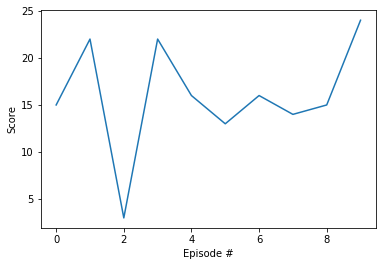

In [6]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=42)

# load the weights from file
checkpoint = 'checkpoint.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the env
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # is episode done?

        score += reward                                # update the score
        state = next_state                             # set state to next state
        if done:                                       # are we done yet?
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()

#### Ideas for Future Work

The improvements mentioned on paper *Rainbow - Combining Improvements in Deep Reinforcement Learning* (such as Prioritized DDQN and Dueling DDQN) could be implemented to achieve better results.